In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
 

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_201313tbl8ny.csv',encoding = "ISO-8859-1")
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows
df.head

<bound method NDFrame.head of                                                Table 8  Unnamed: 1  \
0                                             NEW YORK         NaN   
1                    Offenses Known to Law Enforcement         NaN   
2                                        by City, 2013         NaN   
3                                                 City  Population   
4                                        Adams Village       1,861   
5                             Addison Town and Village       2,577   
6                                        Akron Village       2,846   
7                                               Albany      97,956   
8                                       Albion Village       6,388   
9                                       Alfred Village       4,089   
10                                    Allegany Village       1,781   
11                                        Amherst Town     118,296   
12                                  Amityville Village      

In [3]:
df = df.loc[3:,:]


In [4]:
df

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,36,0,NaN
10,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,10,0,0
11,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,"1,882",32,3
12,Amityville Village,"9,519",9,0,NaN,2,4,3,210,16,188,6,1


In [5]:
df = df.loc[:,['Table 8','Unnamed: 1','Unnamed: 3','Unnamed: 6','Unnamed: 8']]
df.columns = ['City','Population','Murder','Robbery','Property_crimes']

In [6]:
df = df.loc[4:351,:]

In [7]:
df['Population'] = df['Population'].str.replace(',','')
df['Population'] = df['Population'].astype(int)

In [8]:
df['Population^2'] = df.Population*df.Population

In [9]:
df['Murder'] = df['Murder'].str.replace(',','')
df['Murder'] = df['Murder'].astype(int)

df['Property_crimes'] = df['Property_crimes'].str.replace(',','')
df['Property_crimes'] = df['Property_crimes'].astype(int)

df['Robbery'] = df['Robbery'].str.replace(',','')
df['Robbery'] = df['Robbery'].astype(int)

 

In [10]:
df.loc[df['Murder'] > 0, 'Murder'] = 1
df.loc[df['Murder'] <= 0, 'Murder'] = 0
df.loc[df['Murder'] > 0, 'Robbery'] = 1
df.loc[df['Murder'] <= 0, 'Robbery'] = 0

df.index = pd.RangeIndex(len(df.index))
df.index = range(len(df.index))
df

,City,Population,Murder,Robbery,Property_crimes,Population^2
0,Adams Village,1861,0,0,12,3463321
1,Addison Town and Village,2577,0,0,24,6640929
2,Akron Village,2846,0,0,16,8099716
3,Albany,97956,1,1,4090,1005443344
4,Albion Village,6388,0,0,223,40806544
5,Alfred Village,4089,0,0,46,16719921
6,Allegany Village,1781,0,0,10,3171961
7,Amherst Town,118296,1,1,2118,1109041728
8,Amityville Village,9519,0,0,210,90611361
9,Amsterdam,18182,0,0,405,330585124


In [11]:
df.Population.describe().astype(int)

count        348
mean       40037
std       450037
min          526
25%         3003
50%         7233
75%        18427
max      8396126
Name: Population, dtype: int32

c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


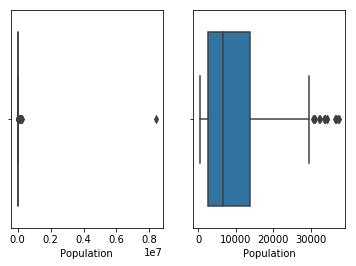

In [12]:
a = df.loc[df['Population'] <40000, 'Population']
fig, ax =plt.subplots(1,2)
sns.boxplot(df['Population'], ax=ax[0])
sns.boxplot(a, ax=ax[1])
fig.show()

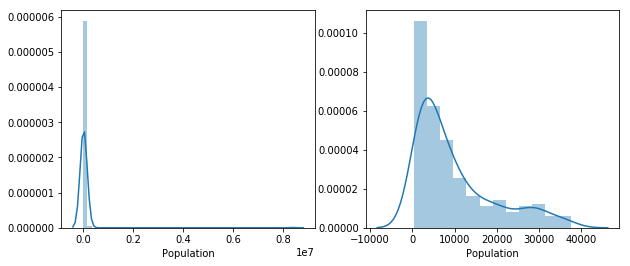

In [13]:
a = df.loc[df['Population'] < 40000, 'Population']

fig, ax =plt.subplots(1,2,figsize=(10,4))
sns.distplot(df['Population'], ax=ax[0])
sns.distplot(a, ax=ax[1])
fig.show()
fig.show()

In [14]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df.Population))
print(z)


[8.49520616e-02 8.33587918e-02 8.27602030e-02 1.28882106e-01
 7.48784129e-02 7.99942331e-02 8.51300806e-02 1.74143430e-01
 6.79111952e-02 4.86339655e-02 8.45248161e-02 7.90284802e-02
 8.76290219e-02 8.34811798e-02 2.84110099e-02 8.16765125e-02
 7.24640305e-02 7.70368929e-02 5.48824315e-02 7.63359432e-02
 4.98689721e-02 1.28944310e-02 1.39441547e-02 8.59556436e-02
 6.23881565e-02 8.68190356e-02 8.39195515e-02 8.45225908e-02
 8.44981132e-02 8.38461187e-02 7.13447362e-02 7.45150086e-03
 7.06593631e-02 7.48739624e-02 8.64807995e-02 4.86773678e-01
 7.44578430e-02 8.49676383e-02 8.41554267e-02 3.53203714e-02
 6.57949947e-02 7.86257123e-02 8.40953453e-02 7.39749666e-02
 8.73975973e-02 1.24071041e-02 8.13471774e-02 8.04993620e-02
 8.69124956e-02 8.07508138e-02 8.30138800e-02 8.50099178e-02
 8.52368920e-02 8.52785832e-02 7.13135829e-02 7.79314383e-02
 2.32907392e-02 9.04945391e-02 8.45337170e-02 7.90729849e-02
 7.24974091e-02 5.30911156e-02 8.49536985e-02 8.50277197e-02
 6.44220233e-02 8.246647

In [15]:
print(np.where(z < -3))
print(np.where(z > 3))

(array([], dtype=int64),)
(array([216], dtype=int64),)


In [22]:
df[216:217] # New York is and outlier

,City,Population,Murder,Robbery,Property_crimes,Population^2
217,New York Mills Village,3324,0,0,64,11048976


In [16]:
df = df.drop(df.index[216])


In [17]:
df

,City,Population,Murder,Robbery,Property_crimes,Population^2
0,Adams Village,1861,0,0,12,3463321
1,Addison Town and Village,2577,0,0,24,6640929
2,Akron Village,2846,0,0,16,8099716
3,Albany,97956,1,1,4090,1005443344
4,Albion Village,6388,0,0,223,40806544
5,Alfred Village,4089,0,0,46,16719921
6,Allegany Village,1781,0,0,10,3171961
7,Amherst Town,118296,1,1,2118,1109041728
8,Amityville Village,9519,0,0,210,90611361
9,Amsterdam,18182,0,0,405,330585124


In [18]:
correlation_matrix = df.corr()
display(correlation_matrix)

,Population,Murder,Robbery,Property_crimes,Population^2
Population,1.000,0.503,0.503,0.887,0.176
Murder,0.503,1.000,1.000,0.443,0.104
Robbery,0.503,1.000,1.000,0.443,0.104
Property_crimes,0.887,0.443,0.443,1.000,0.030
Population^2,0.176,0.104,0.104,0.030,1.000


In [19]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property_crimes'].values.reshape(-1, 1)
X = df[['Murder','Robbery','Population']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-5.12425349 -5.12425349  0.03395581]]

Intercept: 
 [-154.65242937]

R-squared:
0.7872309694617237


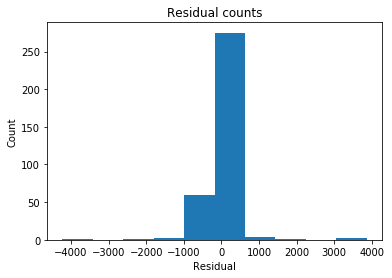

In [21]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property_crimes']

# Calculate the error, also called the residual.
residual = actual - predicted

 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

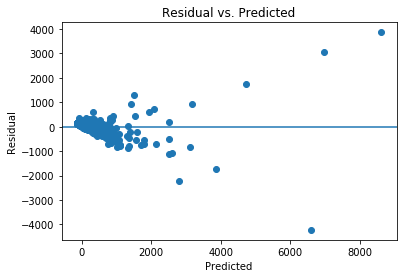

In [23]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()